In [ ]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

In [2]:
os.getenv('ENDPOINT_URL') 

tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
#  If s3 isn't working, you will need to use a copy of the file on your own computer
# e.g.
#tbl_file = '/tank/xavier/Oceanography/AI/OOD/LLC/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_noise_modis2012.parquet


In [3]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.124990,3.401999,6.411,...,64,0,487936,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,124.020691
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315350,3.464000,6.544,...,64,0,517068,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,45.473206
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.912542,3.557000,6.852,...,64,0,58066,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,159.249695
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859069,3.442000,6.709,...,64,0,76355,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,153.434143
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.131550,5.386000,6.852,...,64,0,523013,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,148.887573


In [4]:
llc_table.iloc[0]

modis_lat                                                  -52.410507
modis_lon                                                  -42.126858
modis_col                                                        1028
modis_datetime                                    2012-01-01 04:10:00
modis_LL                                                  -147.370605
modis_row                                                          64
clear_fraction                                               0.049805
mean_temperature                                              4.12499
Tmin                                                         3.401999
Tmax                                                            6.411
T90                                                              5.46
T10                                                             3.562
modis_filename                   AQUA_MODIS.20120101T041007.L2.SST.nc
modis_UID                                          132537589513787314
pp_file             

# Look at 9 random cutouts in pacific at equator

## in pacific

In [5]:
in_pacific = (llc_table.lon > -180.) & (llc_table.lon < -150.)

## in equator

In [6]:
near_equator = np.abs(llc_table.lat) < 10.

In [7]:
# pull out these cutouts

tbl = llc_table[ in_pacific & near_equator]
tbl.head()

,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
234,-3.347702,-160.42628,517,2012-01-01 12:10:00,423.507202,485,0.049805,26.284552,25.958000,26.506001,...,64,0,405435,-3.352844,-160.427078,7714,11371,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,616.342163
235,-3.310879,-160.72763,485,2012-01-01 12:10:00,523.508728,486,0.049561,26.260321,25.949001,26.499001,...,64,0,60650,-3.314291,-160.718750,7716,11357,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,669.464111
236,-3.265855,-161.02708,453,2012-01-01 12:10:00,526.428345,486,0.047852,26.236938,25.945000,26.489000,...,64,0,631588,-3.256456,-161.031250,7719,11342,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,687.388794
237,-3.245071,-159.81061,581,2012-01-01 12:10:00,225.874146,464,0.041199,26.157375,25.885002,26.484001,...,64,0,301922,-3.237177,-159.802078,7720,11401,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,697.914856
238,-3.196371,-161.32404,421,2012-01-01 12:10:00,529.945923,483,0.047241,26.226591,25.963001,26.475000,...,64,0,369699,-3.198615,-161.322922,7722,11328,2012-01-01 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T12_00_...,690.297729


In [8]:
# size of the dataset
tbl.shape

(3368, 26)

In [9]:
# pick 9 random cutouts 
import random

indices = random.sample( range(tbl.shape[0]), 9)

nine_cutouts = tbl.iloc[indices]
nine_cutouts


,modis_lat,modis_lon,modis_col,modis_datetime,modis_LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,LL
40550,-7.999780,-178.98409,311,2012-01-23 13:10:00,311.439331,1769,0.048645,28.432081,28.264000,28.636002,...,64,0,122244,-7.993591,-178.989578,7472,10480,2012-01-23 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-23T12_00_...,699.048950
195695,-1.707663,-168.51338,613,2012-03-31 12:45:00,415.331299,1456,0.035706,26.790199,26.518002,26.974001,...,64,0,604186,-1.712155,-168.510422,7799,10983,2012-03-31 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-31T12_00_...,752.904663
551859,-7.485307,-153.62009,677,2012-10-03 11:45:00,402.295349,1040,0.030212,27.864326,27.712000,27.947001,...,64,0,591436,-7.478584,-153.614578,7499,11698,2012-10-03 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-10-03T12_00_...,832.450134
575601,0.088062,-174.53848,421,2012-10-14 13:05:00,527.819641,432,0.001770,28.333893,28.085001,28.600000,...,64,0,383099,0.087135,-174.531250,7892,10694,2012-10-14 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-10-14T12_00_...,731.265503
110816,-5.616390,-161.01628,677,2012-02-25 12:15:00,294.495483,1392,0.025513,27.151417,26.853001,27.446001,...,64,0,110338,-5.622221,-161.010422,7596,11343,2012-02-25 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-02-25T12_00_...,653.426147
216937,-1.739965,-176.99088,700,2012-04-10 13:25:00,257.170288,325,0.049683,27.574446,27.327002,27.854000,...,64,0,583831,-1.731481,-176.989578,7798,10576,2012-04-10 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-04-10T12_00_...,761.527588
542427,1.211161,-152.13922,197,2012-09-28 11:25:00,329.361023,688,0.043091,26.504980,26.274000,26.753000,...,64,0,393257,1.209506,-152.135422,7950,11769,2012-09-28 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-09-28T12_00_...,791.283081
3293,9.956573,-177.36615,716,2012-01-03 13:30:00,462.656189,1631,0.049683,27.070751,26.937000,27.410002,...,64,0,172358,9.950497,-177.364578,8406,10558,2012-01-03 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-01-03T12_00_...,790.096497
309077,-9.383150,-176.86768,549,2012-05-30 13:15:00,359.590759,112,0.009155,29.233517,29.104000,29.502001,...,64,0,350040,-9.381855,-176.864578,7399,10582,2012-05-30 12:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-05-30T12_00_...,654.939697


<AxesSubplot:>

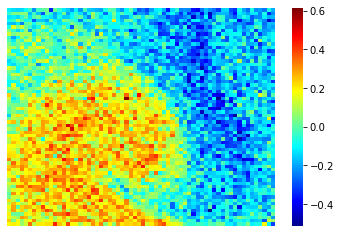

In [17]:
# plot one cutout
cutout5 = nine_cutouts.iloc[4]

img5 = llc_io.grab_image(cutout5)
ulmo_plotting.show_image(img5)


In [18]:
cutout5.filename

's3://llc/ThetaUVSalt/LLC4320_2012-02-25T12_00_00.nc'

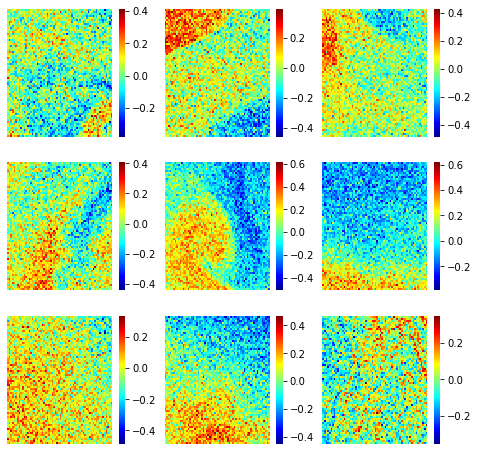

In [12]:
# plot these 9 cutouts side by side (3x3)

fig, axes = plt.subplots(3, 3, figsize = (8,8) )

_, cm = ulmo_plotting.load_palette()

k = 0
for col in range(3):
    for row in range(3):
        ax = axes[row, col]
   
        img = llc_io.grab_image( nine_cutouts.iloc[k] )

        g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm, ax = ax)
        
        k+=1

plt.show()



# Look at Velocity Field of one cutout

### Connect to velocity field of cutout

In [19]:
cutout = nine_cutouts.iloc[1]
cutout.filename

's3://llc/ThetaUVSalt/LLC4320_2012-03-31T12_00_00.nc'

In [20]:
cutout

modis_lat                                                   -1.707663
modis_lon                                                  -168.51338
modis_col                                                         613
modis_datetime                                    2012-03-31 12:45:00
modis_LL                                                   415.331299
modis_row                                                        1456
clear_fraction                                               0.035706
mean_temperature                                            26.790199
Tmin                                                        26.518002
Tmax                                                        26.974001
T90                                                            26.899
T10                                                         26.686001
modis_filename                   AQUA_MODIS.20120331T124508.L2.SST.nc
modis_UID                                           13338829231148662
pp_file             

In [21]:
vel_field = xarray.load_dataset( ulmo_io.open(cutout.filename, 'rb') )

In [22]:
vel_field

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    U        (j, i_g) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    V        (j_g, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    W        (k_l, j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    Salt     (j, i) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [27]:
# use existing python module: grab_velocity function in io.py from ulmo.llc
# list containing u_array (64x64) and v_array (64x64)

vel_output = llc_io.grab_velocity(cutout)
index = cutout.pp_idx
vel_output.append(index)

In [78]:
def cutout_vel_stat(item:tuple):
    """
    Simple function to measure velocity stats
    Enable multi-processing

    Parameters
    ----------
    item : tuple
        field, idx

    Returns
    -------
    idx, stats : int, dict

    """
    # Unpack
    U_cutout, V_cutout, idx = item

    # Deal with nan
    gdU = np.isfinite(U_cutout)
    gdV = np.isfinite(V_cutout)
    
    # Create masked arrays
    u_field = np.ma.masked_array( U_cutout, mask = ~gdU, dtype = 'float' )
    v_field = np.ma.masked_array( V_cutout, mask = ~gdV, dtype = 'float' )

    UV_cutout = np.sqrt(U_cutout**2 + V_cutout**2)
    uv_field = np.ma.masked_array( UV_cutout, mask = ~gdU * ~gdV, dtype = 'float' )

    # Stat dict
    v_stats = {}
    v_stats['U_mean'] = np.mean(u_field)
    v_stats['V_mean'] = np.mean(v_field)
    v_stats['U_rms'] = np.std(u_field)
    v_stats['V_rms'] = np.std(v_field)
    v_stats['UV_mean'] = np.mean(uv_field)
    v_stats['UV_rms'] = np.std(uv_field)

    # Return
    return idx, v_stats

In [94]:
index, stats = cutout_vel_stat(vel_output)
s = pandas.Series( stats, name = 'cutout stats')
s

U_mean    -0.243797
V_mean    -0.063740
U_rms      0.058569
V_rms      0.083119
UV_mean    0.264435
UV_rms     0.062553
Name: cutout stats, dtype: float64